In [69]:
import numpy as np
from tqdm.notebook import tqdm
import scipy

# neural network class definition
class NN:
    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.lr = learning_rate
        
        self.w = np.random.rand(n_hidden, n_inputs) * 2 - 1
        self.wh = np.random.rand(n_outputs, n_hidden) * 2 - 1
    
    def export_w(self):
        return self.w, self.wh
    
    def import_w(self, W):
        self.w, self.wh = W

    def sigm(self, x):
        return 1 / (1 + np.exp(-x))
    
    def rev_sigm(self, x):
        return scipy.special.logit(x)
    
    def fit(self, X, Y, epochs):
        
        for e in range(epochs):
            for x, y in tqdm(list(zip(X, Y))):
                x = np.array(x, ndmin=2).T
                y = np.array(y, ndmin=2).T
                
                h = self.sigm(self.w @ x)
                o = self.sigm(self.wh @ h)

                # Backptopagation
                e = (y - o)
                e_hidden = self.wh.T @ e

                delta_weights_hidden = self.lr * (( e * o * (1 - o) ) @ h.T)
                delta_weights_input = self.lr * (( e_hidden * h * (1 - h) ) @ x.T)

                self.w += delta_weights_input
                self.wh += delta_weights_hidden

            # print(np.sum(e ** 2) / len(e))

    def backward_predict(self, image_vector):
        h = self.wh.T @ self.rev_sigm(image_vector)
        x = self.w.T @ self.rev_sigm(h)
        return x.T
        
            
    def predict(self, x):
        x = x.T
        h = self.sigm(self.w @ x)
        
        return self.sigm(self.wh @ h).T
        

In [70]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
network = NN(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [71]:
network.import_w(W)

In [72]:
network.export_w() == W

True

In [37]:
import pandas as pd

df = pd.read_csv('mnist_dataset/mnist_train.csv')

In [38]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df.drop(columns=['label']))
Y = np.array(df.label)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

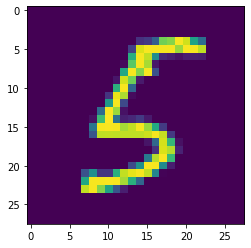

In [61]:
import matplotlib.pyplot as plt

plt.imshow(X_test[7].reshape(28, -1))

In [40]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

X_train = (X_train / 255.0 * 0.99) + 0.01
Y_train_vectors = np.zeros((len(Y_train), output_nodes)) + 0.01
                      
for i, digit in enumerate(Y_train):
    Y_train_vectors[i, digit] = 0.99

network.fit(X_train, Y_train_vectors, epochs)

  0%|          | 0/31500 [00:00<?, ?it/s]

  0%|          | 0/31500 [00:00<?, ?it/s]

  0%|          | 0/31500 [00:00<?, ?it/s]

  0%|          | 0/31500 [00:00<?, ?it/s]

  0%|          | 0/31500 [00:00<?, ?it/s]

In [44]:
W = network.export_w()

In [46]:
Y_train

array([9, 7, 9, ..., 2, 9, 9])

In [47]:
Y_train

array([9, 7, 9, ..., 2, 9, 9])

In [48]:
print(len(Y_test))
print(len(Y_train))

10500
31500


In [62]:
# test the neural network

# scorecard for how well the network performs, initially empty

X_test = (X_test / 255.0 * 0.99) + 0.01
Y_test_vectors = np.zeros((len(Y_test), output_nodes)) + 0.01
                      
for i, digit in enumerate(Y_test):
    Y_test_vectors[i, digit] = 0.99

Y_predicted_vectors = network.predict(X_test)

Y_predicted = []

for result in Y_predicted_vectors:
    Y_predicted.append(np.argmax(result))
    
print("Accuracy: ", sum(Y_predicted == Y_test) / len(Y_test))

Accuracy:  0.09361904761904762


In [50]:
Y_predicted_vectors[:3]

array([[2.33773005e-04, 2.88930988e-02, 9.94490022e-01, 3.78745101e-02,
        4.71959937e-05, 1.11816542e-03, 2.97349309e-03, 1.17750873e-03,
        6.30283728e-04, 2.75606864e-03],
       [9.87212491e-01, 1.46780662e-03, 4.54683348e-03, 1.10418322e-02,
        2.08547763e-04, 1.55990846e-02, 1.07741671e-03, 5.35657643e-02,
        1.40660149e-03, 1.27795363e-02],
       [1.15035372e-04, 9.93647826e-01, 2.52146386e-03, 4.72183635e-03,
        1.50615917e-03, 2.71858903e-03, 8.47017426e-03, 1.27333320e-02,
        2.00891307e-03, 1.06413759e-02]])

In [51]:
Y_test

array([2, 0, 1, ..., 3, 2, 3])

In [52]:
Y_predicted

[2,
 0,
 1,
 2,
 2,
 9,
 9,
 5,
 3,
 3,
 2,
 0,
 9,
 4,
 8,
 1,
 5,
 9,
 1,
 8,
 8,
 1,
 8,
 2,
 1,
 0,
 4,
 3,
 6,
 8,
 0,
 3,
 9,
 0,
 8,
 6,
 8,
 2,
 6,
 8,
 5,
 9,
 9,
 6,
 6,
 3,
 7,
 4,
 5,
 8,
 8,
 2,
 7,
 4,
 2,
 2,
 8,
 5,
 3,
 3,
 5,
 1,
 4,
 0,
 7,
 4,
 8,
 2,
 1,
 3,
 8,
 3,
 2,
 6,
 6,
 8,
 2,
 7,
 7,
 2,
 4,
 5,
 3,
 3,
 0,
 9,
 1,
 8,
 6,
 9,
 4,
 3,
 8,
 9,
 3,
 8,
 2,
 1,
 3,
 0,
 1,
 4,
 4,
 3,
 4,
 3,
 7,
 3,
 5,
 3,
 3,
 1,
 1,
 7,
 2,
 2,
 8,
 8,
 7,
 8,
 7,
 2,
 4,
 8,
 9,
 8,
 3,
 2,
 1,
 6,
 1,
 5,
 3,
 0,
 7,
 4,
 2,
 5,
 9,
 3,
 0,
 0,
 0,
 6,
 4,
 8,
 0,
 7,
 4,
 3,
 4,
 1,
 9,
 2,
 5,
 0,
 1,
 2,
 9,
 3,
 2,
 0,
 4,
 5,
 2,
 8,
 7,
 8,
 1,
 8,
 5,
 2,
 0,
 5,
 9,
 4,
 8,
 8,
 1,
 4,
 2,
 2,
 5,
 6,
 3,
 8,
 0,
 9,
 9,
 4,
 9,
 8,
 1,
 2,
 5,
 6,
 6,
 3,
 5,
 9,
 8,
 3,
 1,
 1,
 6,
 7,
 6,
 6,
 1,
 0,
 8,
 9,
 0,
 9,
 7,
 1,
 6,
 5,
 7,
 1,
 5,
 8,
 1,
 6,
 1,
 9,
 1,
 1,
 0,
 9,
 0,
 2,
 5,
 2,
 4,
 8,
 2,
 7,
 9,
 2,
 9,
 6,
 3,
 2,
 4,
 6,
 7,
 9,
 0,
 7,


In [73]:
v = np.array([0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], ndmin=2).T

network.backward_predict(v)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan